# Matplotlib

In [1]:
import matplotlib.pyplot as plt

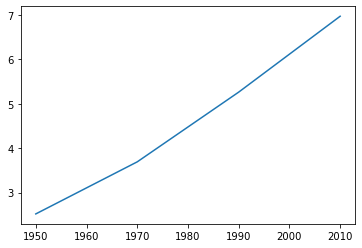

In [2]:
year = [1950, 1970, 1990, 2010]
pop = [2.519, 3.692, 5.263, 6.972]
plt.plot(year, pop)
plt.show()

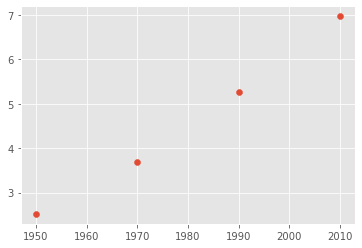

In [3]:
plt.style.use('ggplot')
plt.scatter(year, pop)
plt.show()

In [4]:
plt.style.use('default')

In [5]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `

In [6]:
import numpy as np
values = [np.random.randint(0, 12) for _ in range(0, 12)]
values

[7, 4, 11, 8, 10, 9, 10, 3, 6, 4, 2, 8]

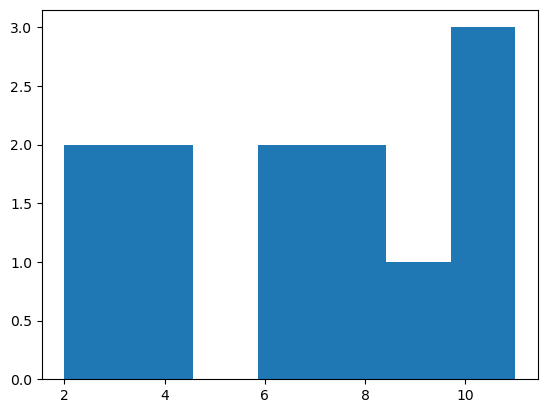

In [7]:
plt.hist(values, bins=7)
plt.show()

## Customization

In [8]:
year = [i for i in range(1950, 2101)]
pop = [i + np.random.random() for i in np.arange(2.538, 10.8, 0.055)]

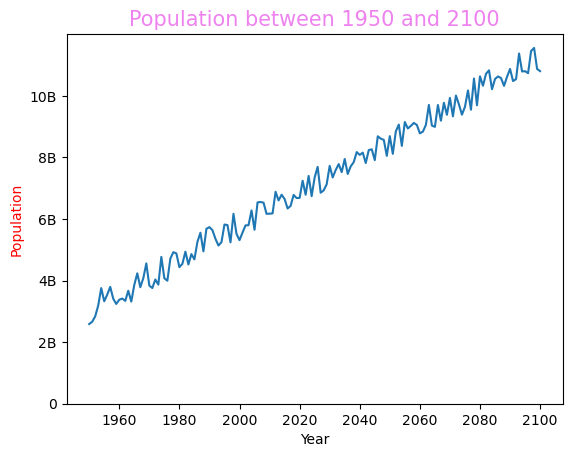

In [9]:
plt.plot(year, pop)
plt.xlabel('Year')
plt.ylabel('Population', color='r')
plt.title('Population between 1950 and 2100', color='violet',
         fontsize=15)
plt.yticks([0, 2, 4, 6, 8, 10],
           ['0', '2B', '4B', '6B', '8B', '10B'])
plt.show()

In [10]:
year = [1800, 1850, 1900] + year

In [11]:
pop = [1.0, 1.262, 1.650] + pop

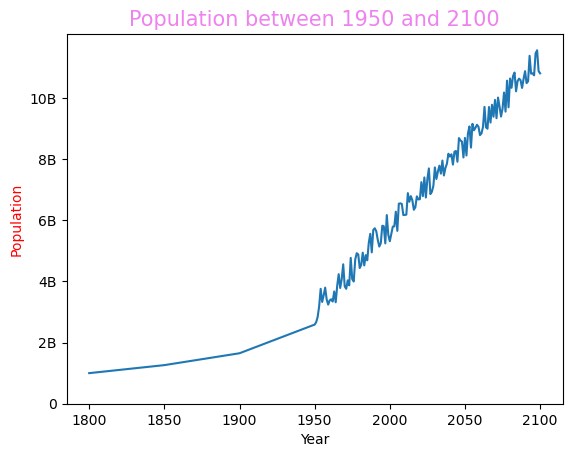

In [12]:
plt.plot(year, pop)
plt.xlabel('Year')
plt.ylabel('Population', color='r')
plt.title('Population between 1950 and 2100', color='violet',
         fontsize=15)
plt.yticks([0, 2, 4, 6, 8, 10],
           ['0', '2B', '4B', '6B', '8B', '10B'])
plt.show()

# Dictionaries and Pandas

In [13]:
import pandas as pd

### DF from dict

In [14]:
dict = {
    'country':['Brazil', 'Russia', 'India'],
    'capital':['Brasilia', 'Moscow', 'New Delhi'],
    'area':[8.516, 17.1, 3.286]
}
brics = pd.DataFrame(dict)

In [15]:
brics

,country,capital,area
0,Brazil,Brasilia,8.516
1,Russia,Moscow,17.100
2,India,New Delhi,3.286


In [16]:
brics.index = ['BR', 'RU', 'IN']

In [17]:
brics

,country,capital,area
BR,Brazil,Brasilia,8.516
RU,Russia,Moscow,17.100
IN,India,New Delhi,3.286


## Selecting and subsetting

### Columns

In [18]:
brics['country'] # series object

BR    Brazil
RU    Russia
IN     India
Name: country, dtype: object

In [19]:
brics[['country']] # df

,country
BR,Brazil
RU,Russia
IN,India


In [20]:
brics[['country', 'capital']]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi


### Rows

In [21]:
brics[0:2]

,country,capital,area
BR,Brazil,Brasilia,8.516
RU,Russia,Moscow,17.100


## loc and iloc

### loc

In [22]:
brics.loc['RU'] # series

country    Russia
capital    Moscow
area         17.1
Name: RU, dtype: object

In [23]:
brics.loc[['RU']] # df

,country,capital,area
RU,Russia,Moscow,17.1


### Row and Column with loc

In [24]:
brics.loc[['RU', 'IN'], ['country', 'capital']]

,country,capital
RU,Russia,Moscow
IN,India,New Delhi


In [25]:
brics.loc[:, ['country']]

,country
BR,Brazil
RU,Russia
IN,India


### iloc

In [26]:
brics.iloc[[0]]

,country,capital,area
BR,Brazil,Brasilia,8.516


In [27]:
brics.iloc[:, [0, 1]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi


### Row and Column with iloc

In [28]:
brics.iloc[[0, 1], [0, 1]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow


# Logical, Control Flow and Filtering

## In numpy

In [29]:
bmi = np.array([21.852, 20.975, 21.75, 24.747, 21.441])

In [30]:
bmi[np.logical_and(bmi > 21, bmi < 22)]

array([21.852, 21.75 , 21.441])

In [31]:
bmi[np.logical_or(bmi < 21, bmi > 22)]

array([20.975, 24.747])

In [32]:
bmi[np.logical_not(bmi > 21)]

array([20.975])

## Filtering DF

In [33]:
brics[brics.area > 8]

,country,capital,area
BR,Brazil,Brasilia,8.516
RU,Russia,Moscow,17.100


In [34]:
brics[np.logical_and(brics.area > 8, brics['area'] < 10)]

,country,capital,area
BR,Brazil,Brasilia,8.516


## Loops over data structures

### over dict

In [35]:
dict_t = {
    'first':1,
    'second':2
}
for k, v in dict_t.items():
    print(k + '-' + str(v))

first-1
second-2


### Over numpy array

In [36]:
height = np.array([1.73, 1.68, 1.71, 1.89, 1.79])
weight = np.array([65.4, 59.2, 63.6, 88.4, 68.7])
meas = np.array([height, weight])

In [37]:
meas

array([[ 1.73,  1.68,  1.71,  1.89,  1.79],
       [65.4 , 59.2 , 63.6 , 88.4 , 68.7 ]])

### Default cycle prints row by row, not values in 2+D arrays
### Need to use nditer func

In [38]:
for i in np.nditer(meas):
    print(i)

1.73
1.68
1.71
1.89
1.79
65.4
59.2
63.6
88.4
68.7


### Over DF

In [39]:
for head, data in brics.iterrows():
    print(head)
    print(data)

BR
country      Brazil
capital    Brasilia
area          8.516
Name: BR, dtype: object
RU
country    Russia
capital    Moscow
area         17.1
Name: RU, dtype: object
IN
country        India
capital    New Delhi
area           3.286
Name: IN, dtype: object


In [40]:
for head, data in brics.iterrows():
    print(head + ':' + data.country)

BR:Brazil
RU:Russia
IN:India


### Create new column with default but inefficient way

In [41]:
for head, data in brics.iterrows():
    brics.loc[head, 'name_length'] = len(data.country)

In [42]:
brics

,country,capital,area,name_length
BR,Brazil,Brasilia,8.516,6.0
RU,Russia,Moscow,17.100,6.0
IN,India,New Delhi,3.286,5.0


### Create new column without loop and with apply func

In [43]:
del brics['name_length']

In [44]:
brics

,country,capital,area
BR,Brazil,Brasilia,8.516
RU,Russia,Moscow,17.100
IN,India,New Delhi,3.286


In [45]:
brics['name_length'] = brics['country'].apply(len)

In [46]:
brics

,country,capital,area,name_length
BR,Brazil,Brasilia,8.516,6
RU,Russia,Moscow,17.100,6
IN,India,New Delhi,3.286,5


# Random

In [47]:
np.random.seed(111)
np.random.rand()

0.6121701756176187

In [48]:
np.random.rand()

0.16906975434563642

In [49]:
np.random.randint(0, 1)

0

## Coin sumulation

In [50]:
test = []
for x in range(1000):
    inner_test=[0]
    for x in range(10):
        coin = np.random.randint(0, 2)
        inner_test.append(inner_test[x] + coin)
    test.append(inner_test[-1])

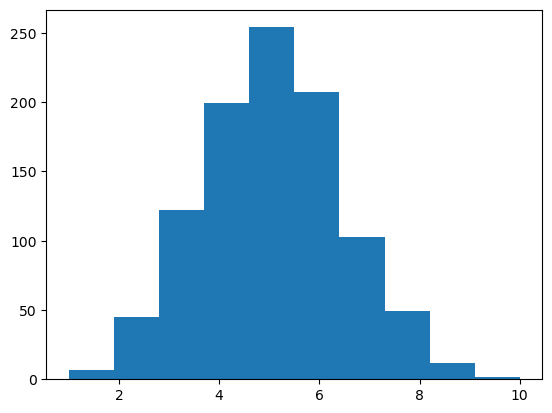

In [51]:
plt.hist(test, bins=10)
plt.show()

### Transpose numpy array

In [52]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [53]:
a = np.transpose(a)